<a href="https://colab.research.google.com/github/saraMuay/Lending-Club-Loan-Data-Analysis/blob/main/LendingClubLoan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from numpy import where
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
import plotly.graph_objs as go
import plotly
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
#from sklearn.metrics import roc_auc_score
#from sklearn import metrics  # may cuse error 2.7 
from sklearn.metrics import classification_report,confusion_matrix
#from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
import warnings   
warnings.filterwarnings('ignore')
%matplotlib inline

In [87]:
#Import the dataset to colab files from githup
!git clone https://github.com/saraMuay/Lending-Club-Loan-Data-Analysis

fatal: destination path 'Lending-Club-Loan-Data-Analysis' already exists and is not an empty directory.


In [88]:
data = pd.read_csv('https://raw.githubusercontent.com/saraMuay/Lending-Club-Loan-Data-Analysis/main/loan_data.csv')
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [90]:
data.shape

(9578, 14)

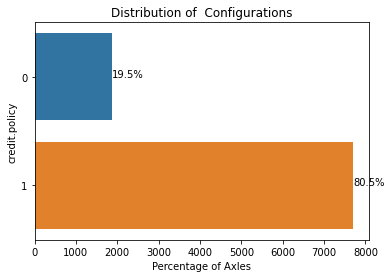

In [91]:
def bar_plot(df,column):    
    ax = sns.countplot(y=column, data=df)
    plt.title('Distribution of  Configurations')
    plt.xlabel('Percentage of Axles')
    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    plt.show()
bar_plot(data, "credit.policy")


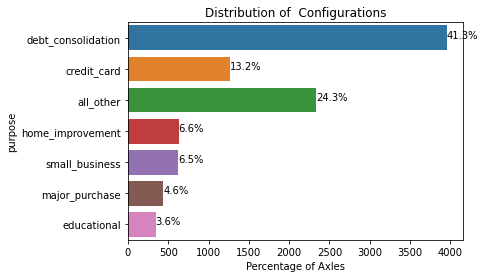

In [92]:
bar_plot(data, "purpose")

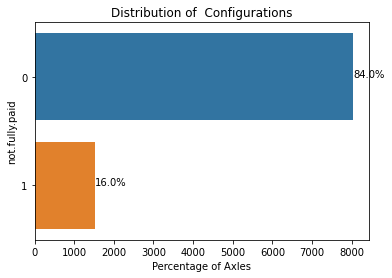

In [93]:
bar_plot(data, "not.fully.paid")

Text(0.5, 0, 'FICO')

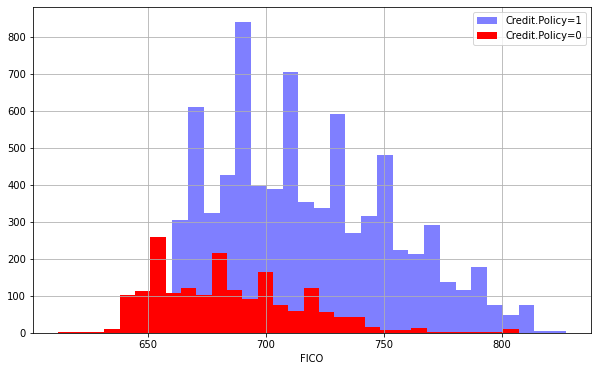

In [94]:
plt.figure(figsize=(10,6))
data[data['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
data[data['credit.policy']==0]['fico'].hist(color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

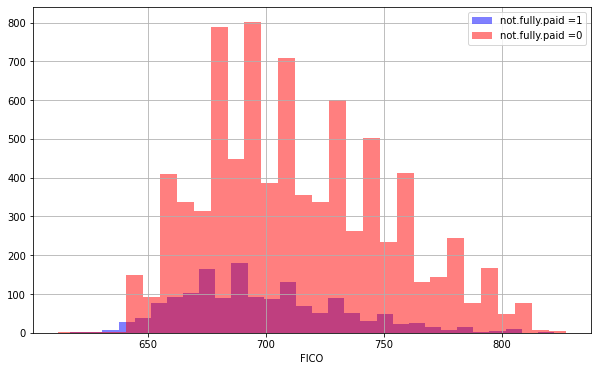

In [95]:
plt.figure(figsize=(10,6))
data[data['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid =1')
data[data['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid =0')
plt.legend()
plt.xlabel('FICO')

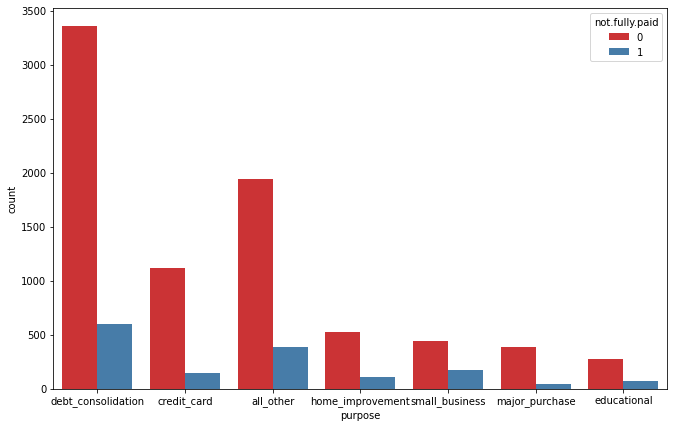

In [96]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data= data ,palette='Set1')
plt.show()

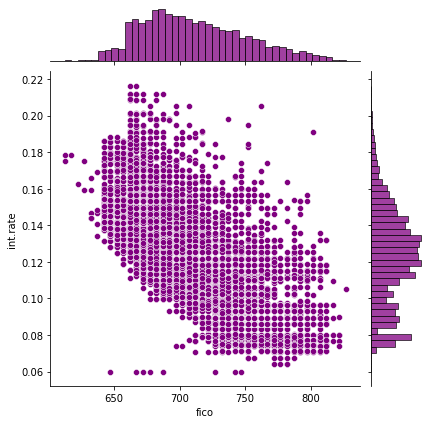

In [97]:
sns.jointplot(x='fico',y='int.rate',data=data,color='purple')
plt.show()

<Figure size 792x504 with 0 Axes>

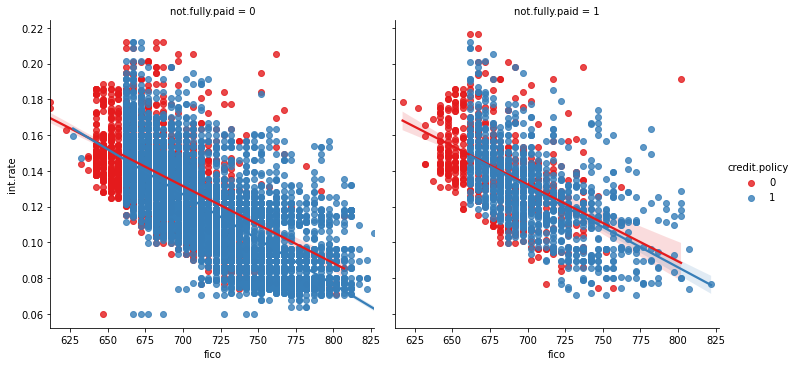

In [98]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=data ,hue='credit.policy',
           col='not.fully.paid',palette='Set1')
plt.show()

In [99]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

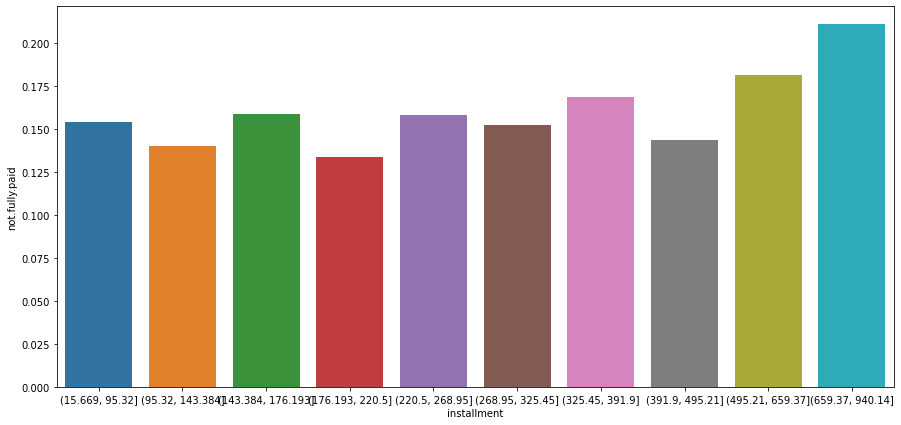

In [101]:
plt.figure(figsize=(15,7))
w = pd.qcut(data.installment,10)
sns.barplot(x=w ,y=data['not.fully.paid'], ci=None, data=data)
plt.show()

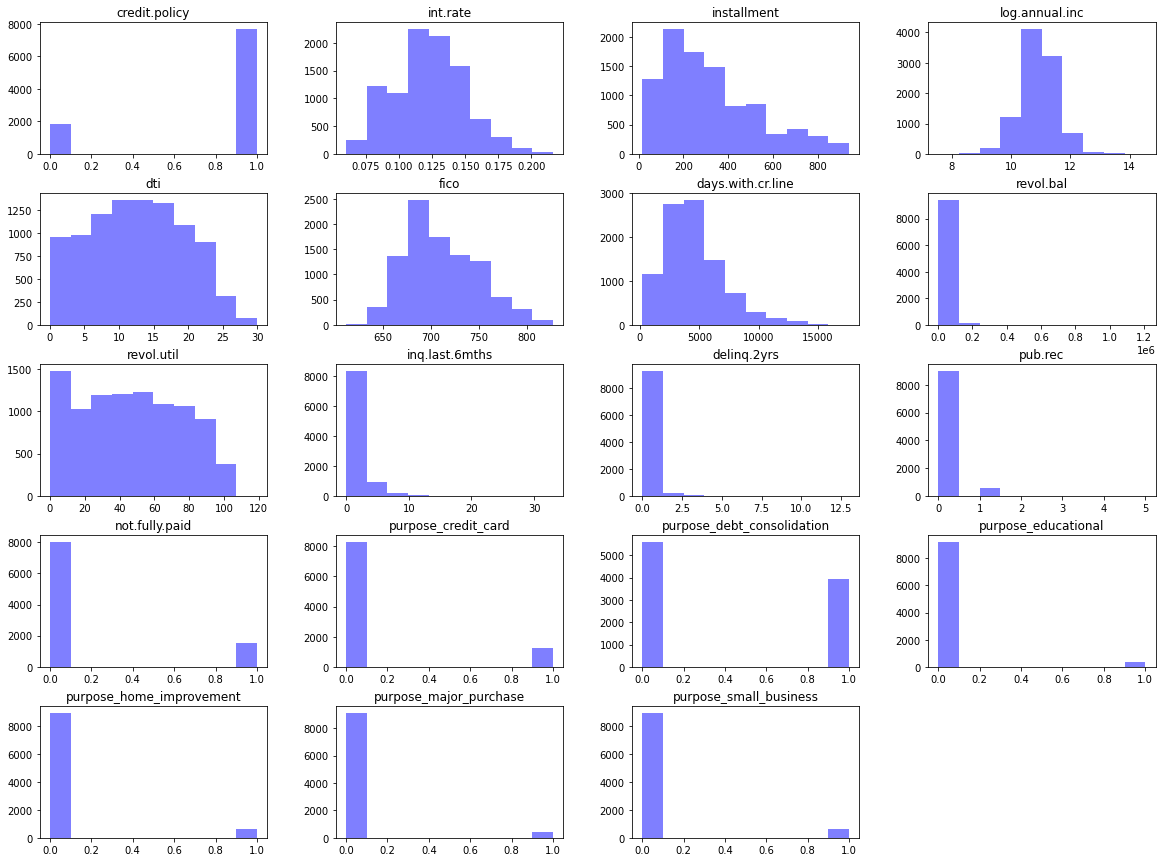

In [102]:
data.hist(figsize=(20,15), color = 'b', alpha= 0.5 ,grid= False)
plt.show()

In [103]:
# Visualize the corrolation 
data.corr().style.background_gradient(cmap='YlGnBu')

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,-0.042109,0.123607,-0.019618,-0.050697,-0.068978,0.151247
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,0.000774,0.161658,-0.094510,0.023024,-0.079836,0.145654
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,0.072942,-0.026214,-0.119799,0.116375,-0.031020,0.091540
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,0.084476,0.179149,-0.035325,-0.092788,-0.077719,-0.069245
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666,-0.012512,-0.154132,-0.013012,0.097474,0.067129,0.063292
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237,0.046220,-0.009318,-0.042621,0.068087,-0.020561,0.034883
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699,0.072316,0.005785,-0.034743,0.003258,-0.062395,0.083069
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088,0.091321,0.211869,-0.053128,-0.114449,-0.108079,-0.060962
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452,-0.033640,-0.044240,0.024243,0.043827,-0.001445,0.042567


There is no strong correlation

In [104]:
#data= data.drop(columns=  ['purpose_credit_card',	'purpose_debt_consolidation',	'purpose_educational'	,'purpose_home_improvement',	'purpose_major_purchase',	'purpose_small_business'])

In [105]:
#data.shape

Feature important

In [106]:
X = data.drop('not.fully.paid',axis=1)

Y = data['not.fully.paid']


In [107]:
#clf = ExtraTreesClassifier(random_state=10)
#clf = clf.fit(X,Y)
#importances = clf.feature_importances_
#importances

In [108]:
#features_to_drop = (importances <= 0.01)
#features_indexes, = np.where(features_to_drop == True)
#features_indexes

In [109]:
#dataList = [go.Bar(x = data.columns, y = clf.feature_importances_)]
#layout = go.Layout(title='Feature Importances',autosize=False,width=1000,height=500, margin=go.Margin(l=50, r=50, b=250,t=50,pad=4))
#fig = go.Figure(data=dataList, layout=layout)
#fig

In [110]:
#model = SelectFromModel(clf, threshold = 0.01, prefit=True)
# = model.transform(X)
#x.shape

In [111]:
#x[:,12]

In [112]:
Y.value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

Oversampling the dataset using ADASYN for unbalance data 

In [114]:
counter_before= Counter(Y)
print('Before',counter_before) #dataset before oversampling

ada= ADASYN(random_state=130)
x,y = ada.fit_resample(X,Y)

counter_after = Counter(y)

print('After',counter_after) #dataset after oversampling

Before Counter({0: 8045, 1: 1533})
After Counter({0: 8045, 1: 7837})


In [115]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)
print( X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12705, 18) (3177, 18) (12705,) (3177,)


In [116]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test[0]

array([1.        , 0.50908169, 0.46051646, 0.50455421, 0.52861549,
       0.45582544, 0.32868311, 0.01775744, 0.71651277, 0.03030303,
       0.        , 0.0933004 , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        ])

In [117]:
model = Sequential()
model.add(Dense(79,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam') 


In [118]:
model.fit(X_train , y_train,epochs=25,batch_size=256,validation_data=(X_test, y_test))

Epoch 1/25
50/50 [==============================] - 1s 6ms/step - loss: 0.6835 - val_loss: 0.6457
Epoch 2/25
50/50 [==============================] - 0s 3ms/step - loss: 0.6529 - val_loss: 0.6237
Epoch 3/25
50/50 [==============================] - 0s 3ms/step - loss: 0.6384 - val_loss: 0.6154
Epoch 4/25
50/50 [==============================] - 0s 4ms/step - loss: 0.6211 - val_loss: 0.5931
Epoch 5/25
50/50 [==============================] - 0s 3ms/step - loss: 0.6083 - val_loss: 0.5803
Epoch 6/25
50/50 [==============================] - 0s 3ms/step - loss: 0.5940 - val_loss: 0.5601
Epoch 7/25
50/50 [==============================] - 0s 3ms/step - loss: 0.5687 - val_loss: 0.5402
Epoch 8/25
50/50 [==============================] - 0s 3ms/step - loss: 0.5638 - val_loss: 0.5237
Epoch 9/25
50/50 [==============================] - 0s 3ms/step - loss: 0.5445 - val_loss: 0.5104
Epoch 10/25
50/50 [==============================] - 0s 3ms/step - loss: 0.5397 - val_loss: 0.5029
Epoch 11/25
50/50 [

In [119]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 79)                1501      
_________________________________________________________________
dropout_12 (Dropout)         (None, 79)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 39)                3120      
_________________________________________________________________
dropout_13 (Dropout)         (None, 39)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 19)                760       
_________________________________________________________________
dropout_14 (Dropout)         (None, 19)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

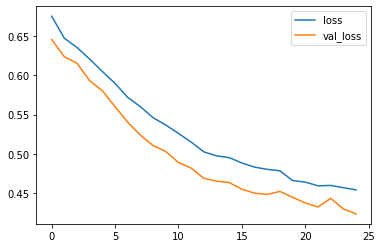

In [120]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()
plt.show()

In [121]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81      1630
           1       0.86      0.67      0.75      1547

    accuracy                           0.79      3177
   macro avg       0.80      0.78      0.78      3177
weighted avg       0.80      0.79      0.78      3177



In [122]:
confusion_matrix(y_test,predictions)

array([[1460,  170],
       [ 508, 1039]])